# Linear Regression l1正则化

In [1]:
import pandas as pd

## 读取数据

In [2]:
train = pd.read_csv("./all/train.csv")
test = pd.read_csv("./all/test.csv")

In [3]:
todrop = []
for column in train.columns:
    if train[column].dtype == 'object':
        todrop.append(column)
    #print(column,' ',data[column].dtype,' ',data[column][0])

In [4]:
train = train.drop(todrop, axis=1)
test = test.drop(todrop, axis=1)

## 补充NULL值

In [5]:
print(train.isnull().sum())
print('-'*50)
print(test.isnull().sum())

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64
--------------------------------------------------
Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt   

In [6]:
datasets = [train, test]
for dataset in datasets:
    ret = dataset.isnull().sum()
    for index in ret.index:
        if ret[index] != 0:
            dataset[index].fillna(value=dataset[index].mean(), inplace=True)

In [7]:
print(train.isnull().sum())
print('-'*50)
print(test.isnull().sum())

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64
--------------------------------------------------
Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtU

## 提取资料矩阵

In [8]:
import numpy as np

In [9]:
label = train['SalePrice']
train = train.drop(['SalePrice', 'Id'], axis=1)
testId = test['Id']
test = test.drop('Id', axis=1)

In [10]:
print(train.shape)
print(test.shape)

(1460, 36)
(1459, 36)


## 归一化

In [11]:
train = (train - train.mean(0))/train.std(0)
test = (test - test.mean(0))/test.std(0)

In [12]:
train = np.hstack((np.ones((train.shape[0],1)),train))
test = np.hstack((np.ones((test.shape[0],1)),test))

In [13]:
label = (label - label.mean(0))/label.std(0)

In [14]:
origin_train = train.copy()
train = train[:1000, :]
origin_trainId = label.copy()
trainId = label[:1000]

## 闭式解

### 无正则项

In [15]:
theta = np.linalg.solve(train.T.dot(train),train.T.dot(trainId))

In [16]:
np.set_printoptions(precision=3, suppress=True)
theta

array([ 0.007, -0.059,  0.03 ,  0.057,  0.271,  0.049,  0.086,  0.065,
        0.065,  0.053, -0.013, -0.041,  0.145,  0.008,  0.008, -0.007,
        0.306,  0.029,  0.004,  0.01 ,  0.002, -0.141, -0.05 ,  0.165,
        0.028,  0.046, -0.   ,  0.072,  0.023, -0.012,  0.006, -0.01 ,
        0.039, -0.026, -0.001, -0.022, -0.017])

In [17]:
train_error = np.linalg.norm((train.dot(theta)-trainId).T)/train.shape[0]
train_error

0.01234175633140587

In [18]:
test_error = np.linalg.norm(origin_train[1000:,:].dot(theta)-origin_trainId[1000:])/origin_train[1000:,:].shape[0]
test_error

0.025458576865193473

### l2正则化

lambda=1,train_error=0.012341772477674477,test_error=0.02545178955226393
lambda=5,train_error=0.01234214682899876,test_error=0.025425617746927955
lambda=10,train_error=0.012343257059386034,test_error=0.025394939855438343
lambda=20,train_error=0.012347320956324037,test_error=0.025339497687732485
lambda=30,train_error=0.012353419262251378,test_error=0.025290706556653858
lambda=40,train_error=0.012361151233105975,test_error=0.02524740978513918
lambda=50,train_error=0.012370206728556373,test_error=0.025208717794906372
lambda=75,train_error=0.012397153324256572,test_error=0.025127883249537047
lambda=100,train_error=0.01242830351651632,test_error=0.02506410966606741
lambda=200,train_error=0.012570622848036287,test_error=0.024905613318373588
lambda=300,train_error=0.012719436058152633,test_error=0.0248250665633379
lambda=400,train_error=0.012866405787595929,test_error=0.024781948897411105
lambda=500,train_error=0.01301043316315764,test_error=0.024761347435303668
lambda=600,train_error=0.01315

Text(0,0.5,'val error')

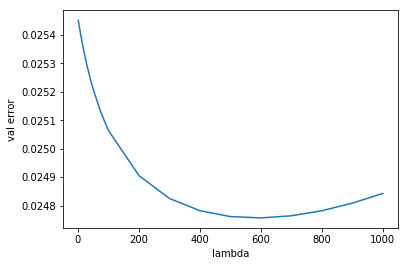

In [70]:
lambs = [1,5,10,20,30,40,50,75,100,200,300,400,500,600,700,800,900,1000]
test_error = np.zeros((len(lambs),))
for lamb in lambs:
    theta = np.linalg.solve(lamb*np.eye(train.shape[1])+train.T.dot(train),train.T.dot(trainId))
    train_error = np.linalg.norm((train.dot(theta)-trainId).T)/train.shape[0]
    test_error[lambs.index(lamb)] = np.linalg.norm(origin_train[1000:,:].dot(theta)-origin_trainId[1000:])/origin_train[1000:,:].shape[0]
    print(f"lambda={lamb},train_error={train_error},test_error={test_error[lambs.index(lamb)]}")

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(lambs,test_error)
plt.xlabel('lambda')
plt.ylabel('val error')

(array([2., 4., 7., 4., 6., 5., 6., 1., 1., 1.]),
 array([-0.039, -0.022, -0.004,  0.014,  0.032,  0.05 ,  0.068,  0.086,
         0.103,  0.121,  0.139]),
 <a list of 10 Patch objects>)

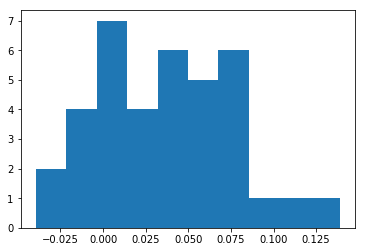

In [71]:
plt.hist(theta)

### l1正则化

In [78]:
def costl1(X,Y,theta,lamd):
    return (X.dot(theta)-Y).T.dot(X.dot(theta)-Y)+lamd*np.sum(np.abs(theta))

def cost(X,Y,theta,lamd):
    return (X.dot(theta)-Y).T.dot(X.dot(theta)-Y)

lambs = [0.001,0.01,0.1,0.5,1,5,10]
epsilon = 1e-3
for lamb in lambs:
    delta = 1
    theta = np.random.random((train.shape[1],))
    while delta > epsilon:
        turn_cost = 0
        theta_before = theta.copy()
        for i in range(theta.shape[0]):
            Xi = train[:,i]
            theta_bar = theta.copy()
            theta_bar[i] = 0
            thetai_si_eq_1 = max((Xi.T.dot(trainId)-Xi.T.dot(train).dot(theta_bar)-lamb)/np.linalg.norm(Xi)**2,0)
            thetai_si_eq_m1 = min((Xi.T.dot(trainId)-Xi.T.dot(train).dot(theta_bar)+lamb)/np.linalg.norm(Xi)**2,0)

            theta_si_eq_1 = theta_bar.copy()
            theta_si_eq_1[i] += thetai_si_eq_1

            theta_si_eq_m1 = theta_bar.copy()
            theta_si_eq_m1[i] += thetai_si_eq_m1


            if costl1(train,trainId,theta_si_eq_1,lamb) > costl1(train,trainId,theta_si_eq_m1,lamb):
                theta[i] = thetai_si_eq_m1
            else:
                theta[i] = thetai_si_eq_1

            turn_cost += min(costl1(train,trainId,theta_si_eq_1,lamb),costl1(train,trainId,theta_si_eq_m1,lamb))
    
        delta = np.linalg.norm(theta_before-theta)
    test_error = np.linalg.norm(origin_train[1000:,:].dot(theta)-origin_trainId[1000:])/origin_train[1000:,:].shape[0]
    print("lambda=",lamb,"error=",test_error)

lambda= 0.001 error= 0.025449699118986948
lambda= 0.01 error= 0.025447624886472866
lambda= 0.1 error= 0.025447376558575922
lambda= 0.5 error= 0.025435039697639467
lambda= 1 error= 0.02542530966735849
lambda= 5 error= 0.02526325880921689
lambda= 10 error= 0.025140139189195044


In [74]:
theta

array([ 0.002, -0.053,  0.025,  0.056,  0.277,  0.039,  0.081,  0.068,
        0.064,  0.097,  0.   ,  0.   ,  0.102,  0.004,  0.   , -0.004,
        0.311,  0.023,  0.   ,  0.002,  0.   , -0.12 , -0.046,  0.147,
        0.029,  0.04 ,  0.003,  0.074,  0.023, -0.001,  0.   , -0.005,
        0.035, -0.013,  0.   , -0.016, -0.009])

(array([ 1.,  0.,  0.,  2.,  2., 15.,  4.,  3.,  4.,  1.,  2.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-0.12 , -0.099, -0.077, -0.056, -0.034, -0.013,  0.009,  0.031,
         0.052,  0.074,  0.095,  0.117,  0.139,  0.16 ,  0.182,  0.203,
         0.225,  0.246,  0.268,  0.29 ,  0.311]),
 <a list of 20 Patch objects>)

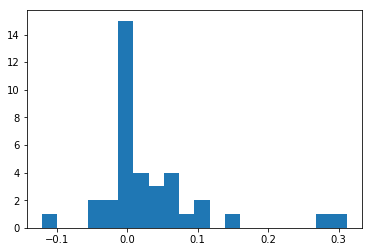

In [75]:
plt.hist(theta,20)

In [76]:
test_error = np.linalg.norm(origin_train[1000:,:].dot(theta)-origin_trainId[1000:])/origin_train[1000:,:].shape[0]
test_error

0.025265322017165567